## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [1]:
# your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import chisquare


In [2]:
mu=2.435
poisson.rvs(mu=2.435, size=7)

array([1, 3, 3, 1, 2, 5, 2], dtype=int64)

(array([0.11479592, 0.27742347, 0.38584184, 0.        , 0.34438776,
        0.19132653, 0.        , 0.07015306, 0.03826531, 0.00637755]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

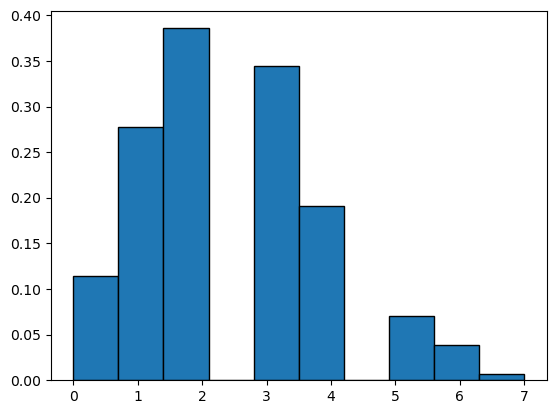

In [3]:
x = poisson.rvs(mu=2.435, size=448)

#create plot of Poisson distribution
plt.hist(x, density=True, edgecolor='black')

In [4]:
prob = poisson.cdf(x, mu)
np.allclose(x, poisson.ppf(prob, mu))

True

In [5]:
#calculate probability
poisson.pmf(k=7, mu=2.435)

0.008821758386159596

In [18]:
observed = [35, 99, 104, 110, 62, 25, 10, 3]
expected = [poisson.pmf(i, mu=2.435)*448 for i in range(7)]
expected.append((1-poisson.cdf(6, mu=2.435))*448)
chisquare(observed, expected)

Power_divergenceResult(statistic=6.491310681109786, pvalue=0.4836889068537311)

In [ ]:
#chi_square_ value > critical value, the null hypothesis is rejected, expected and observed frequencies were different

## Question 2
The following are the ordered values of a random sample of SAT scores (university entrance exam) for several students: 852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063. In previous years, the scores were presented by N (985,50). Based on the sample, is there any reason to believe that there has been a change in the distribution of scores this year? Use the level alpha = 0.05. 

In [21]:
#your answer here
from scipy import stats
a = (852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063)
b = (985,50)
stats.ttest_ind(a, b, equal_var=False)
#pvalue = 0.5>0.05, we fail to reject the null hypothesis.there no reason to believe that there has been a change in the distribution of scores this year

Ttest_indResult(statistic=0.9859983963537087, pvalue=0.5041715730690788)

## Question 3
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table4.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

In [8]:
# your code here
items = np.array([0, 1, 2, 3, 4])
freq = np.array([32, 15, 0, 9, 4])
mean = sum(items*freq)/sum(freq)
mean

0.9666666666666667

In [9]:
poisson.pmf(k=4, mu=0.9666666666666667)

0.013838140375988038

In [10]:
observed = [32, 15, 0, 9, 4]
expected = [poisson.pmf(i, mu=0.9666666666666667)*60 for i in items[:-1]]
expected.append((1-poisson.cdf(3, mu=mean))*60)
chisquare(observed, expected)
#Since the p value <0.05 we are going to reject the null hypothesis that this distribution stems from a poisson dist.

Power_divergenceResult(statistic=34.32169618960069, pvalue=6.401393042020276e-07)

## Question 4
A quality control engineer takes a simple of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

In [19]:
# your answer here
from scipy.stats import ttest_1samp
data = np.random.binomial(200, 0.05, 10)
ttest_1samp(data, 0.05)

Ttest_1sampResult(statistic=13.68226171779672, pvalue=2.500331204450516e-07)

## Question 5
A researcher gathers information about the patterns of physical activity (AF) of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (1 = Low, 2 = Medium, 3 = High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (1 = consumed, 0 = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table5.png)

In [24]:
### your answer here
from scipy.stats import chi2_contingency
obs=np.array([[32, 14, 6], [12, 22, 9]])
chi2_contingency(obs)

(10.712198008709638,
 0.004719280137040844,
 2,
 array([[24.08421053, 19.70526316,  8.21052632],
        [19.91578947, 16.29473684,  6.78947368]]))

In [26]:
g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")
g, p

(10.975981909150999, 0.004136145536821807)

In [ ]:
#P value<0.05 we reject the null hypothesis the two are independent